In [68]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

df_fake = pd.read_csv('fake.csv')
df_true = pd.read_csv('true.csv')



In [69]:
df_fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [70]:
df_true['class'] = 0; df_fake['class'] = 1
df = pd.concat([df_fake, df_true])
X = TfidfVectorizer(stop_words='english', max_features=40
).fit_transform(df['title'])

In [71]:
df_fake

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1


In [72]:
df_true

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


In [73]:

df

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


In [74]:
X

<44898x40 sparse matrix of type '<class 'numpy.float64'>'
	with 68054 stored elements in Compressed Sparse Row format>

In [75]:
from sklearn import tree
from sklearn import svm, metrics
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [81]:
clf = tree.DecisionTreeClassifier(max_depth=10)
y = list(df['class'])
#print(target)
X_train, X_test, y_train, y_test = train_test_split(X,  y,random_state=1 )
clf = clf.fit(X_train,y_train)
expected = y_test
predicted = clf.predict(X_test)
acc = metrics.accuracy_score(expected, predicted)
acc

0.7798663697104677

Test Acc           C    TPR    FPR
   0.714     3.00000  0.455  0.006
   0.733     4.00000  0.494  0.007
   0.733     5.00000  0.494  0.007
   0.748     6.00000  0.546  0.033
   0.759     7.00000  0.564  0.029
   0.769     8.00000  0.583  0.029
   0.776     9.00000  0.596  0.029
   0.781    10.00000  0.607  0.031
   0.787    11.00000  0.619  0.032


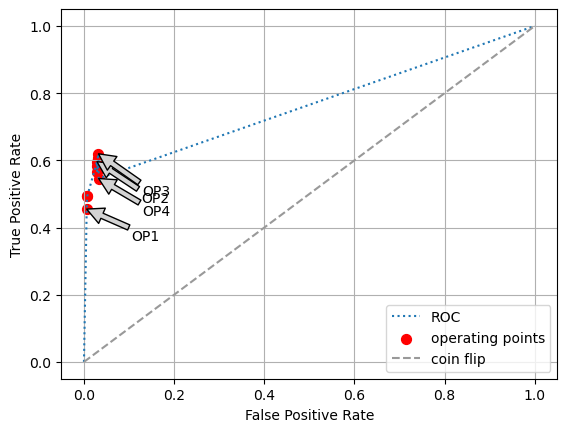

In [105]:
def annot(opi, _x, _y):
    plt.annotate(f"OP{opi}", xy=(_x, _y), xytext=(.90*_x+.1, .80*_y), arrowprops=dict(facecolor='lightgray', shrink=1))

# Training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# max depth Decision Tree
C = (3,4,5,6,7,8,9,10,11)

# Let's vary C and generate training/testing sessions to collect data for ROC
print(f'{"Test Acc":>8s} {"C":>11s} {"TPR":>6s} {"FPR":>6s}')
FPR, TPR = [], []
for c in C:
    pipe_lr = make_pipeline(StandardScaler(with_mean=False),
                            tree.DecisionTreeClassifier(max_depth=c))
    pipe_lr.fit(X_train, y_train)
    y_pred = pipe_lr.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    TPR += [tp/(tp+fn)]  # Pd
    FPR += [fp/(fp+tn)]  # Pf

    print(f'{pipe_lr.score(X_test, y_test):8.3f} {c:11.5f} {TPR[-1]:6.3f} {FPR[-1]:6.3f}')

FPR, TPR = zip(*sorted(zip(FPR, TPR)))
fpr = [0.]+list(FPR)+[1.]; tpr = [0.]+list(TPR)+[1.]

# Plot
fig, ax = plt.subplots()
plt.plot(fpr, tpr, ':', label='ROC')
plt.scatter(FPR, TPR, 50, color='red', marker='o', label='operating points')
plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='coin flip')

# Annotate certain operating points
annot(1, fpr[1], tpr[1])
annot(2, fpr[4], tpr[4])
annot(3, fpr[8], tpr[8])
annot(4, fpr[9], tpr[9])

# Labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Test Acc           C    TPR    FPR
   0.805     1.00000  0.689  0.069
   0.806     3.00000  0.689  0.067
   0.805     4.00000  0.689  0.068
   0.807     5.00000  0.690  0.066
   0.807     6.00000  0.691  0.066
   0.807     7.00000  0.690  0.065
   0.807     8.00000  0.690  0.067
   0.807     9.00000  0.690  0.066
   0.807    10.00000  0.690  0.066
   0.808    11.00000  0.690  0.065
   0.807    12.00000  0.690  0.065
   0.806    17.00000  0.689  0.067
   0.807    15.00000  0.691  0.066
   0.807    20.00000  0.691  0.065
   0.807    40.00000  0.690  0.066


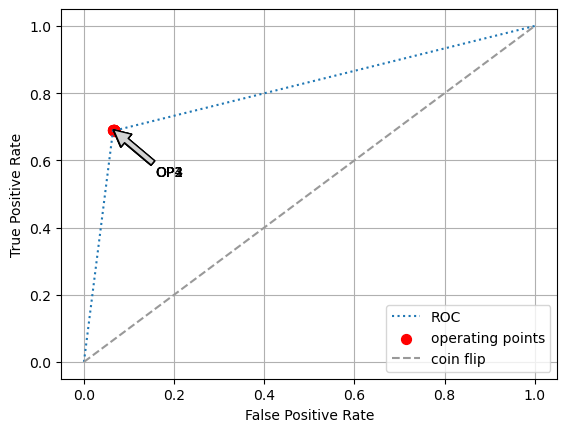

In [104]:
def annot(opi, _x, _y):
    plt.annotate(f"OP{opi}", xy=(_x, _y), xytext=(.90*_x+.1, .80*_y), arrowprops=dict(facecolor='lightgray', shrink=1))

# Training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Max Features decision tree
C = (1,3,4,5,6,7,8,9,10,11,12,17,15,20,40)

# Let's vary C and generate training/testing sessions to collect data for ROC
print(f'{"Test Acc":>8s} {"C":>11s} {"TPR":>6s} {"FPR":>6s}')
FPR, TPR = [], []
for c in C:
    pipe_lr = make_pipeline(StandardScaler(with_mean=False),
                            tree.DecisionTreeClassifier(max_features=c))
    pipe_lr.fit(X_train, y_train)
    y_pred = pipe_lr.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    TPR += [tp/(tp+fn)]  # Pd
    FPR += [fp/(fp+tn)]  # Pf

    print(f'{pipe_lr.score(X_test, y_test):8.3f} {c:11.5f} {TPR[-1]:6.3f} {FPR[-1]:6.3f}')

FPR, TPR = zip(*sorted(zip(FPR, TPR)))
fpr = [0.]+list(FPR)+[1.]; tpr = [0.]+list(TPR)+[1.]

# Plot
fig, ax = plt.subplots()
plt.plot(fpr, tpr, ':', label='ROC')
plt.scatter(FPR, TPR, 50, color='red', marker='o', label='operating points')
plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='coin flip')

# Annotate certain operating points
annot(1, fpr[1], tpr[1])
annot(2, fpr[4], tpr[4])
annot(3, fpr[8], tpr[8])
annot(4, fpr[9], tpr[9])

# Labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Test Acc           C    TPR    FPR
   0.808    20.00000  0.692  0.065
   0.807    31.00000  0.692  0.067
   0.808    42.00000  0.691  0.064
   0.809    53.00000  0.691  0.063
   0.808    64.00000  0.690  0.064
   0.809    75.00000  0.694  0.066
   0.807    86.00000  0.691  0.066
   0.808    97.00000  0.694  0.068


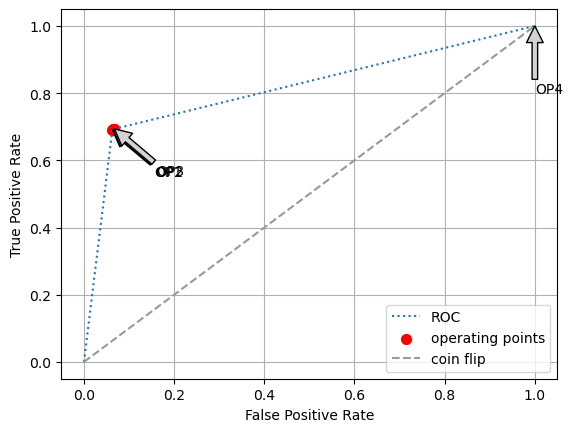

In [103]:
from sklearn.ensemble import RandomForestClassifier

def annot(opi, _x, _y):
    plt.annotate(f"OP{opi}", xy=(_x, _y), xytext=(.90*_x+.1, .80*_y), arrowprops=dict(facecolor='lightgray', shrink=1))

# Training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# n_estimators random forest
C = (x for x in range(20,100,11))

# Let's vary C and generate training/testing sessions to collect data for ROC
print(f'{"Test Acc":>8s} {"C":>11s} {"TPR":>6s} {"FPR":>6s}')
FPR, TPR = [], []
for c in C:
    pipe_lr = make_pipeline(StandardScaler(with_mean=False),
                            RandomForestClassifier(n_estimators=c))
    pipe_lr.fit(X_train, y_train)
    y_pred = pipe_lr.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    TPR += [tp/(tp+fn)]  # Pd
    FPR += [fp/(fp+tn)]  # Pf

    print(f'{pipe_lr.score(X_test, y_test):8.3f} {c:11.5f} {TPR[-1]:6.3f} {FPR[-1]:6.3f}')

FPR, TPR = zip(*sorted(zip(FPR, TPR)))
fpr = [0.]+list(FPR)+[1.]; tpr = [0.]+list(TPR)+[1.]

# Plot
fig, ax = plt.subplots()
plt.plot(fpr, tpr, ':', label='ROC')
plt.scatter(FPR, TPR, 50, color='red', marker='o', label='operating points')
plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='coin flip')

# Annotate certain operating points
annot(1, fpr[1], tpr[1])
annot(2, fpr[4], tpr[4])
annot(3, fpr[8], tpr[8])
annot(4, fpr[9], tpr[9])

# Labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Test Acc           C    TPR    FPR
[0 0 0 ... 0 1 1]
   0.811     3.00000  0.696  0.064
[0 0 1 ... 0 1 1]
   0.810     5.00000  0.697  0.065
[0 0 1 ... 0 1 1]
   0.810     7.00000  0.696  0.064
[0 0 1 ... 0 1 1]
   0.811     9.00000  0.697  0.064
[0 0 1 ... 0 1 1]
   0.810    11.00000  0.696  0.065
[0 0 0 ... 0 1 1]
   0.810    13.00000  0.697  0.066
[0 0 1 ... 0 1 1]
   0.810    15.00000  0.695  0.064
[0 0 0 ... 0 1 1]
   0.809    17.00000  0.695  0.066
[0 0 1 ... 0 1 1]
   0.810    19.00000  0.695  0.065


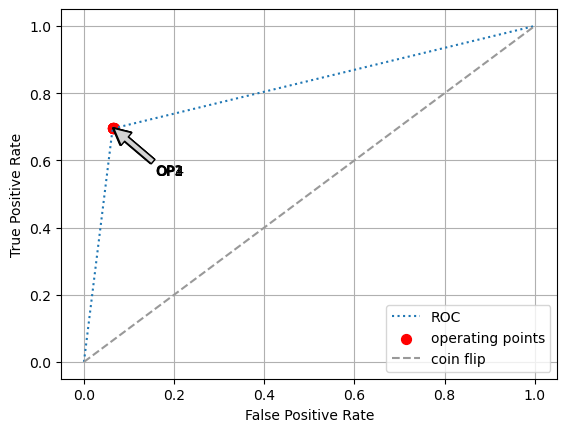

In [111]:
from sklearn.ensemble import RandomForestClassifier

def annot(opi, _x, _y):
    plt.annotate(f"OP{opi}", xy=(_x, _y), xytext=(.90*_x+.1, .80*_y), arrowprops=dict(facecolor='lightgray', shrink=1))

# Training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# max_features random forest
C = (x for x in range(3,20,2))

# Let's vary C and generate training/testing sessions to collect data for ROC
print(f'{"Test Acc":>8s} {"C":>11s} {"TPR":>6s} {"FPR":>6s}')
FPR, TPR = [], []
for c in C:
    pipe_lr = make_pipeline(StandardScaler(with_mean=False),
                            RandomForestClassifier(max_features=c))
    pipe_lr.fit(X_train, y_train)
    y_pred = pipe_lr.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    TPR += [tp/(tp+fn)]  # Pd
    FPR += [fp/(fp+tn)]  # Pf

    print(f'{pipe_lr.score(X_test, y_test):8.3f} {c:11.5f} {TPR[-1]:6.3f} {FPR[-1]:6.3f}')

FPR, TPR = zip(*sorted(zip(FPR, TPR)))
fpr = [0.]+list(FPR)+[1.]; tpr = [0.]+list(TPR)+[1.]

# Plot
fig, ax = plt.subplots()
plt.plot(fpr, tpr, ':', label='ROC')
plt.scatter(FPR, TPR, 50, color='red', marker='o', label='operating points')
plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='coin flip')

# Annotate certain operating points
annot(1, fpr[1], tpr[1])
annot(2, fpr[4], tpr[4])
annot(3, fpr[8], tpr[8])
annot(4, fpr[9], tpr[9])

# Labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Test Acc           C    TPR    FPR
  -0.000     1.00000  1.000  1.000
   0.459     2.00000  0.673  0.061
   0.429     3.00000  0.674  0.070
   0.457     4.00000  0.681  0.066
   0.441     5.00000  0.676  0.065
   0.464     6.00000  0.679  0.060
   0.460     7.00000  0.680  0.065
   0.462     8.00000  0.684  0.064
   0.462     9.00000  0.684  0.064


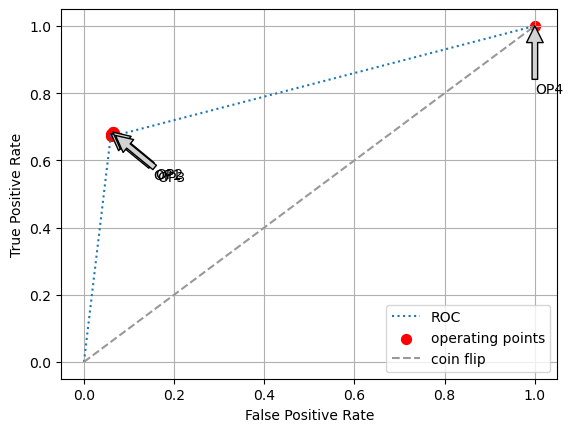

In [112]:
from sklearn.neural_network import MLPRegressor

def annot(opi, _x, _y):
    plt.annotate(f"OP{opi}", xy=(_x, _y), xytext=(.90*_x+.1, .80*_y), arrowprops=dict(facecolor='lightgray', shrink=1))

def fix_prediction(x):
    for i in range(len(x)):
        x[i] = round(x[i])
    
# Training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# hidden layer size MLP
C = (x for x in range(1,10))

# Let's vary C and generate training/testing sessions to collect data for ROC
print(f'{"Test Acc":>8s} {"C":>11s} {"TPR":>6s} {"FPR":>6s}')
FPR, TPR = [], []
for c in C:
    pipe_lr = make_pipeline(StandardScaler(with_mean=False),
                            MLPRegressor(hidden_layer_sizes=c))
    pipe_lr.fit(X_train, y_train)
    y_pred = pipe_lr.predict(X_test)
    fix_prediction(y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    TPR += [tp/(tp+fn)]  # Pd
    FPR += [fp/(fp+tn)]  # Pf

    print(f'{pipe_lr.score(X_test, y_test):8.3f} {c:11.5f} {TPR[-1]:6.3f} {FPR[-1]:6.3f}')

FPR, TPR = zip(*sorted(zip(FPR, TPR)))
fpr = [0.]+list(FPR)+[1.]; tpr = [0.]+list(TPR)+[1.]

# Plot
fig, ax = plt.subplots()
plt.plot(fpr, tpr, ':', label='ROC')
plt.scatter(FPR, TPR, 50, color='red', marker='o', label='operating points')
plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='coin flip')

# Annotate certain operating points
annot(1, fpr[1], tpr[1])
annot(2, fpr[4], tpr[4])
annot(3, fpr[8], tpr[8])
annot(4, fpr[9], tpr[9])

# Labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Test Acc           C    TPR    FPR
   0.480 constant  0.699  0.066
   0.475 invscaling  0.686  0.055
   0.477 adaptive  0.693  0.060


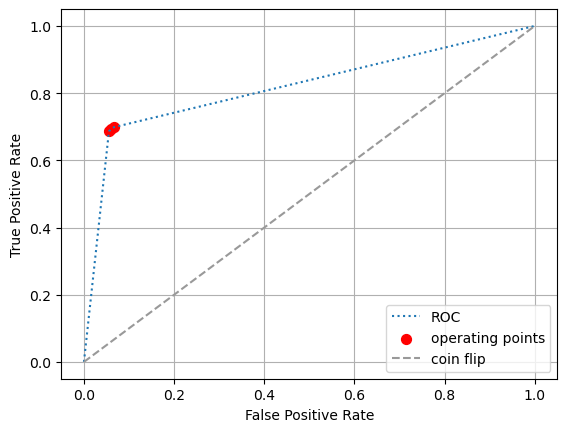

In [114]:
from sklearn.neural_network import MLPRegressor

def annot(opi, _x, _y):
    plt.annotate(f"OP{opi}", xy=(_x, _y), xytext=(.90*_x+.1, .80*_y), arrowprops=dict(facecolor='lightgray', shrink=1))

def fix_prediction(x):
    for i in range(len(x)):
        x[i] = round(x[i])
    
# Training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# learning rate size MLP
C = ('constant', 'invscaling', 'adaptive')

# Let's vary C and generate training/testing sessions to collect data for ROC
print(f'{"Test Acc":>8s} {"C":>11s} {"TPR":>6s} {"FPR":>6s}')
FPR, TPR = [], []
for c in C:
    pipe_lr = make_pipeline(StandardScaler(with_mean=False),
                            MLPRegressor(learning_rate=c))
    pipe_lr.fit(X_train, y_train)
    y_pred = pipe_lr.predict(X_test)
    fix_prediction(y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    TPR += [tp/(tp+fn)]  # Pd
    FPR += [fp/(fp+tn)]  # Pf

    print(f'{pipe_lr.score(X_test, y_test):8.3f} {c:s} {TPR[-1]:6.3f} {FPR[-1]:6.3f}')

FPR, TPR = zip(*sorted(zip(FPR, TPR)))
fpr = [0.]+list(FPR)+[1.]; tpr = [0.]+list(TPR)+[1.]

# Plot
fig, ax = plt.subplots()
plt.plot(fpr, tpr, ':', label='ROC')
plt.scatter(FPR, TPR, 50, color='red', marker='o', label='operating points')
plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='coin flip')

# Annotate certain operating points


# Labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()